<a href="https://colab.research.google.com/github/khansartz/Animal-Classification/blob/main/Animals_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: Animals


## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Success

In [2]:
import os
import random
from random import sample
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import shutil

# Image processing
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from skimage.transform import resize
from skimage.util import random_noise
from skimage.exposure import adjust_gamma

# Deep learning
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import (
    InputLayer, Conv2D, SeparableConv2D,
    MaxPooling2D, MaxPool2D, Dense, Flatten,
    Dropout, BatchNormalization
)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import tensorflow.keras.preprocessing.image as keras_image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Warning
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.19.0


## Data Preparation

### Data Loading

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khansartz","key":"45499645474f1473e896fe62629d1776"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

### Data Preprocessing

#### Split Dataset

In [7]:
dataset_path = "raw-img/"
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "ragno": "spider"
}

# Rename semua folder
for old_name in os.listdir(dataset_path):
    if old_name in translate:
        new_name = translate[old_name]
        os.rename(os.path.join(dataset_path, old_name), os.path.join(dataset_path, new_name))
        print(f"Renamed {old_name} ➡️ {new_name}")

Renamed scoiattolo ➡️ squirrel
Renamed elefante ➡️ elephant
Renamed gallina ➡️ chicken
Renamed cavallo ➡️ horse
Renamed farfalla ➡️ butterfly
Renamed cane ➡️ dog
Renamed gatto ➡️ cat
Renamed mucca ➡️ cow
Renamed ragno ➡️ spider
Renamed pecora ➡️ sheep


Jumlah Gambar per Kelas:
- chicken: 3098 gambar
- dog: 4863 gambar
- spider: 4821 gambar

Total Semua Kelas: 12782 gambar

Ukuran rata-rata gambar (dari 1 contoh per kelas): 275x242


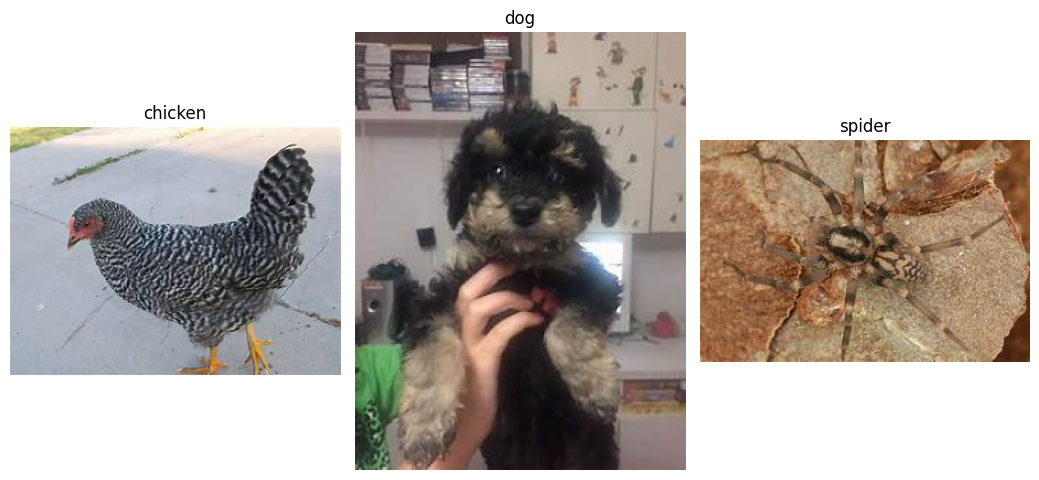

In [8]:
# Path ke folder dataset
dataset_path = "raw-img/"

# Kelas yang akan digunakan
selected_classes = ['chicken', 'dog', 'spider']

image_counts = {}
image_shapes = []
example_images = {}

# Loop per kelas
for cls in selected_classes:
    class_path = os.path.join(dataset_path, cls)
    image_list = os.listdir(class_path)

    # Simpan jumlah gambar per kelas
    image_counts[cls] = len(image_list)

    # Ambil 1 gambar contoh untuk disimpan
    sample_path = os.path.join(class_path, image_list[0])
    img = Image.open(sample_path)
    example_images[cls] = img
    image_shapes.append(img.size)

# Print jumlah gambar per kelas dan total
print("Jumlah Gambar per Kelas:")
total_images = 0

for cls, count in image_counts.items():
    print(f"- {cls}: {count} gambar")
    total_images += count

# Print total gambar
print(f"\nTotal Semua Kelas: {total_images} gambar")

# Cek dimensi rata-rata
widths, heights = zip(*image_shapes)
avg_width = sum(widths) // len(widths)
avg_height = sum(heights) // len(heights)
print(f"\nUkuran rata-rata gambar (dari 1 contoh per kelas): {avg_width}x{avg_height}")

# Menampilkan contoh gambar dari tiap kelas
plt.figure(figsize=(len(selected_classes) * 3.5, 5))
for i, cls in enumerate(selected_classes):
    plt.subplot(1, len(selected_classes), i + 1)
    plt.imshow(example_images[cls])
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

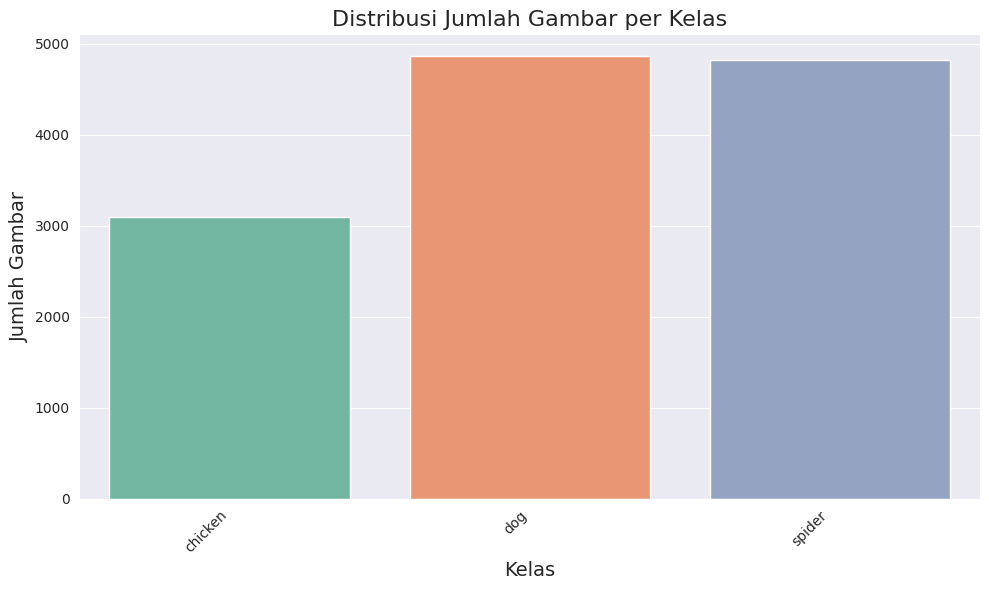

In [9]:
image_paths = []
labels = []

# Iterasi untuk setiap kelas yang dipilih
for cls in selected_classes:
    class_path = os.path.join(dataset_path, cls)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image_paths.append(image_path)
        labels.append(cls)

# Membuat DataFrame
distribution_train = pd.DataFrame({'image_paths': image_paths, 'labels': labels})

# Plot distribusi gambar per kelas
Label = distribution_train['labels']
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
plot_data = sns.countplot(x=Label, palette="Set2")

# Judul dan label
plt.title("Distribusi Jumlah Gambar per Kelas", fontsize=16)
plt.xlabel("Kelas", fontsize=14)
plt.ylabel("Jumlah Gambar", fontsize=14)

plt.xticks(rotation=45, ha="right")

# Tampilkan plot
plt.tight_layout()
plt.show()

In [10]:
image_paths = []
labels = []

for cls in selected_classes:
    class_path = os.path.join(dataset_path, cls)
    for image in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, image))
        labels.append(cls)

# Buat DataFrame
df = pd.DataFrame({'path': image_paths, 'labels': labels})

# Split ke train/val/test (70/15/15)
X_temp, X_test, y_temp, y_test = train_test_split(
    df['path'], df['labels'], test_size=0.15, stratify=df['labels'], random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

# Gabungkan jadi satu DataFrame final
df_train = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'val'})
df_test = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)

# Cek distribusi per set per kelas
print("Distribusi data:")
print(df_all.groupby(['set', 'labels']).size())

# Path buat dataset hasil split
output_path = "Dataset-Split"

# Salin file ke folder tujuan
for _, row in tq(df_all.iterrows(), total=len(df_all)):
    dest_dir = os.path.join(output_path, row['set'], row['labels'])
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy2(row['path'], os.path.join(dest_dir, os.path.basename(row['path'])))

Distribusi data:
set    labels 
test   chicken     465
       dog         730
       spider      723
train  chicken    2168
       dog        3403
       spider     3375
val    chicken     465
       dog         730
       spider      723
dtype: int64


  0%|          | 0/12782 [00:00<?, ?it/s]

In [11]:
TRAIN_DIR = "Dataset-Split/train/"
TEST_DIR = "Dataset-Split/test/"
VAL_DIR = "Dataset-Split/val/"

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False
)

Found 1918 images belonging to 3 classes.
Found 8946 images belonging to 3 classes.
Found 1918 images belonging to 3 classes.


## Modelling

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,899 (1.74 MB)

 Trainable params: 455,939 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [13]:
# Callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 138s 442ms/step - accuracy: 0.5650 - loss: 0.9644 - val_accuracy: 0.3766 - val_loss: 1.5607 - learning_rate: 5.0000e-04
Epoch 2/20
  1/279 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.8125 - loss: 0.5004

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8125 - loss: 0.5004 - val_accuracy: 0.3808 - val_loss: 1.5442 - learning_rate: 5.0000e-04
Epoch 3/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 142s 511ms/step - accuracy: 0.7352 - loss: 0.6455 - val_accuracy: 0.7876 - val_loss: 0.5417 - learning_rate: 5.0000e-04
Epoch 4/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6875 - loss: 0.5888 - val_accuracy: 0.7733 - val_loss: 0.5581 - learning_rate: 5.0000e-04
Epoch 5/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 142s 511ms/step - accuracy: 0.7899 - loss: 0.5269 - val_accuracy: 0.8517 - val_loss: 0.4221 - learning_rate: 5.0000e-04
Epoch 6/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9375 - loss: 0.2613 - val_accuracy: 0.8517 - val_loss: 0.4141 - learning_rate: 5.0000e-04
Epoch 7/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 142s 509ms/step - accuracy: 0.8422 - loss: 0.4165 - val_accuracy: 0.8305 - val_loss: 0.4250 - learning_rate: 5.0000e-04
Epoch 8/20
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accur

## Evaluasi dan Visualisasi

In [14]:
# Evaluasi model
evaluation = model.evaluate(
    test_generator,
    steps=len(test_generator),
    verbose=1
)

# Output hasil
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8636 - loss: 0.3788
Test Loss: 0.28516480326652527
Test Accuracy: 0.8988529443740845


In [15]:
# Evaluasi Train, Validation, dan Test Set
train_loss, train_acc = model.evaluate(train_generator, verbose=1)
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

# Output Akurasi
print(f"Akurasi Train Set: {train_acc*100:.2f}%")
print(f"Akurasi Validation Set: {val_acc*100:.2f}%")
print(f"Akurasi Test Set: {test_acc*100:.2f}%")

280/280 ━━━━━━━━━━━━━━━━━━━━ 104s 370ms/step - accuracy: 0.9248 - loss: 0.2130
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9051 - loss: 0.2697
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8636 - loss: 0.3788
Akurasi Train Set: 92.61%
Akurasi Validation Set: 92.08%
Akurasi Test Set: 89.89%


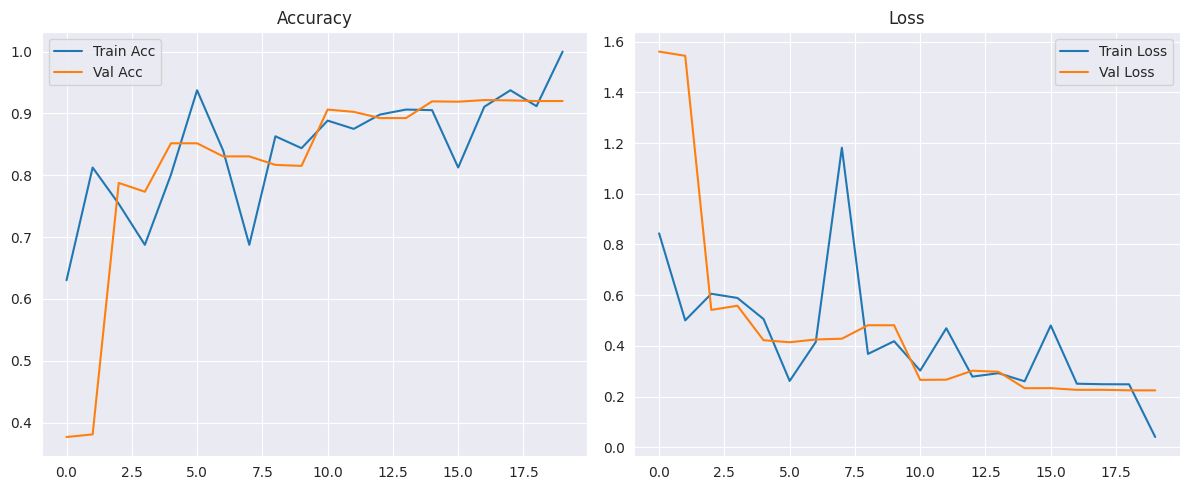

In [16]:
#Visualisasi
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


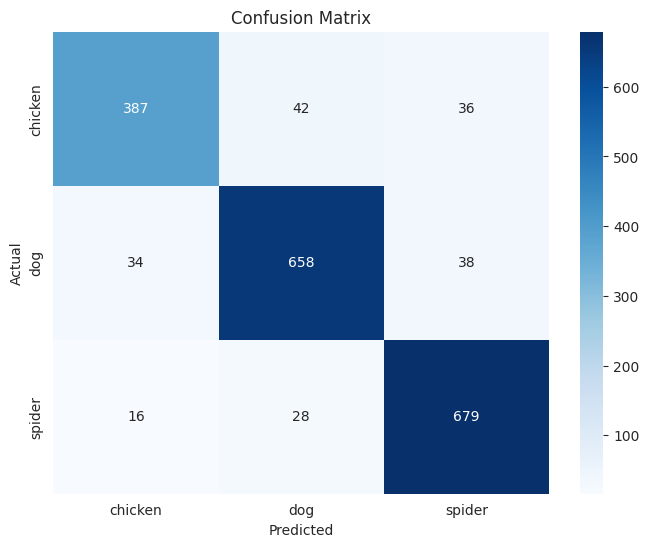

              precision    recall  f1-score   support

     chicken     0.8856    0.8323    0.8581       465
         dog     0.9038    0.9014    0.9026       730
      spider     0.9017    0.9391    0.9201       723

    accuracy                         0.8989      1918
   macro avg     0.8971    0.8909    0.8936      1918
weighted avg     0.8986    0.8989    0.8984      1918



In [17]:
# Reset generator untuk memastikan urutan hasil prediksi
test_generator.reset()

# Prediksi
preds = model.predict(test_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))

## Konversi Model

In [18]:
# SavedModel
tf.saved_model.save(model, 'saved_model')

# TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpen model.tflite ke folder tflite/
os.makedirs('tflite', exist_ok=True)
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

# Simpen label.txt
class_names = ['chicken', 'dog', 'spider']

with open('tflite/label.txt', 'w') as f:
    for label in class_names:
        f.write(label + '\n')

# TensorFlow.js
tfjs.converters.save_keras_model(model, 'tfjs_model')

Saved artifact at '/tmp/tmpit4yrgs8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136848683785040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683787536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683787920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683787344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683786192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683786384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683786960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683789072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683789456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136848683787728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13684868378926

failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


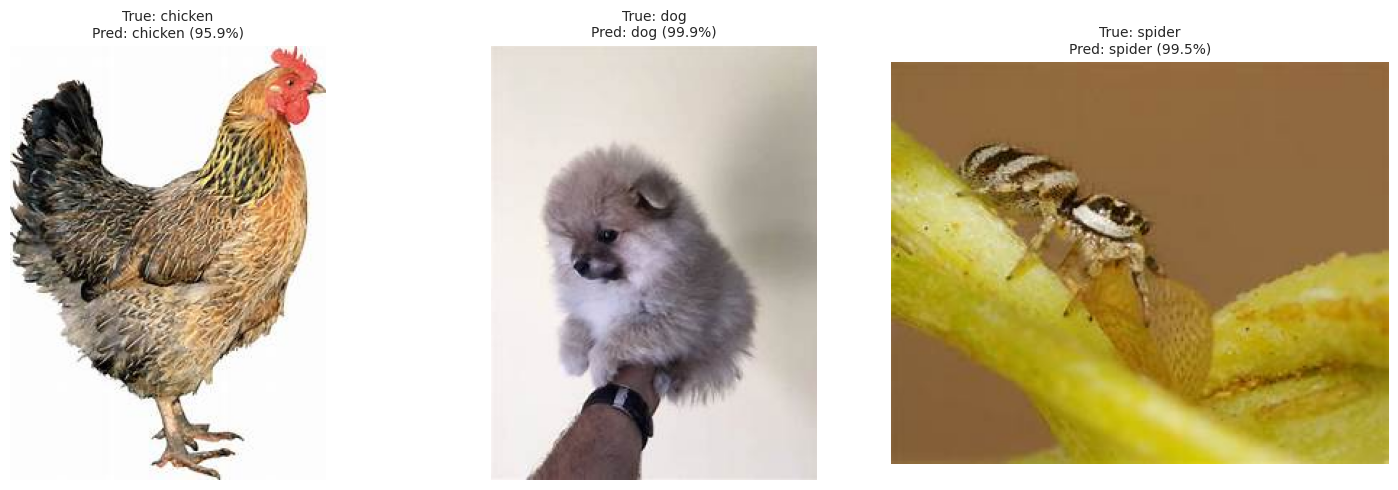

In [22]:
# Load model
model = load_model('best_model.keras')

# Nama kelas
class_names = ['chicken', 'dog', 'spider']
test_dir = 'Dataset-Split/test'

# Fungsi prediksi
def classify_image(img_path, model, img_size=(128, 128)):
    img = keras_image.load_img(img_path, target_size=img_size)
    img_arr = keras_image.img_to_array(img)
    img_arr = np.expand_dims(img_arr / 255.0, axis=0)

    probs = model.predict(img_arr)[0]
    predicted_idx = np.argmax(probs)
    predicted_label = class_names[predicted_idx]
    confidence = probs[predicted_idx]

    return predicted_label, confidence

# Simpan hasil gambar dan judul buat digabungkan
imgs = []
titles = []

for cls in class_names:
    cls_folder = os.path.join(test_dir, cls)
    images = [img for img in os.listdir(cls_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if images:
        chosen_img = os.path.join(cls_folder, random.choice(images))
        predicted_label, conf = classify_image(chosen_img, model)

        img_display = Image.open(chosen_img)
        imgs.append(img_display)
        titles.append(f"True: {cls}\nPred: {predicted_label} ({conf:.1%})")
    else:
        print(f"Tidak ada gambar di folder '{cls}'")

# Tampilkan semua gambar dalam satu baris horizontal
plt.figure(figsize=(5 * len(imgs), 5))
for i, img in enumerate(imgs):
    plt.subplot(1, len(imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(titles[i], fontsize=10)
plt.tight_layout()
plt.show()